In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing data

path = r'/Users/alejandroguillen/Documents/Instacart Basket Analysis'

In [3]:
insta_combined = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'instacart_combined.pkl'))

# Data Exploration

In [4]:
#Checking first 5 rows
insta_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#Checking size

insta_combined.shape

(32404859, 33)

In [6]:
#Checking data types and columns

insta_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int32   
 1   user_id                object  
 2   order_number           int8    
 3   orders_day_of_week     int8    
 4   order_hour_of_day      int8    
 5   days_since_last_order  float16 
 6   product_id             int32   
 7   add_to_cart_order      int32   
 8   reordered              int8    
 9   product_name           object  
 10  aisle_id               int8    
 11  department_id          int8    
 12  prices                 float16 
 13  _merge                 category
 14  price_range_loc        object  
 15  busiest_day            object  
 16  busiest_days           object  
 17  busiest_period_of_day  object  
 18  max_order              int8    
 19  loyalty_flag           object  
 20  mean_price             float16 
 21  spending_flag          object

# Follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

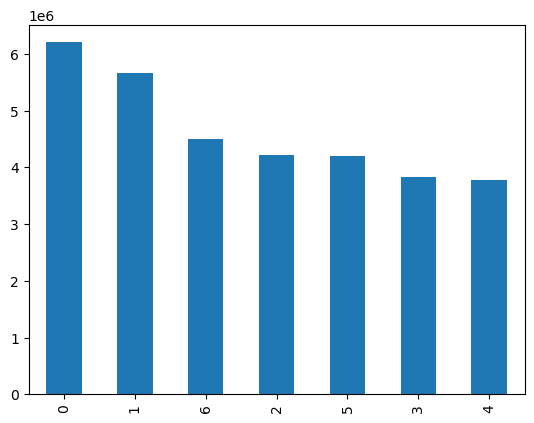

In [7]:
#Creating bar chart for order_day_of_week column
bar = insta_combined['orders_day_of_week'].value_counts().plot.bar()

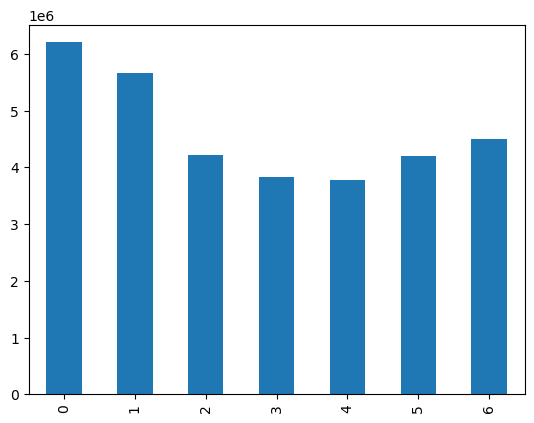

In [8]:
#Sorting the bar chart according to index order
bar_1 = insta_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

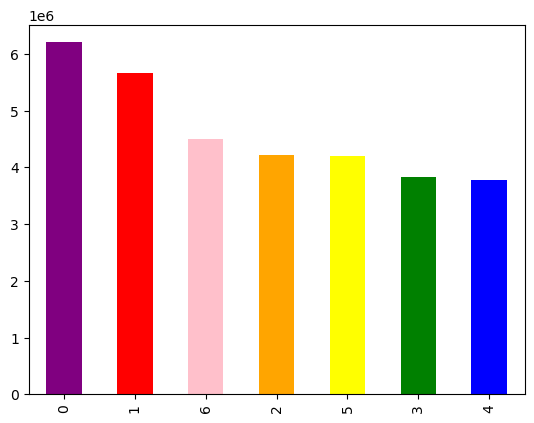

In [9]:
#Changing the colors
bar_2 = insta_combined['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

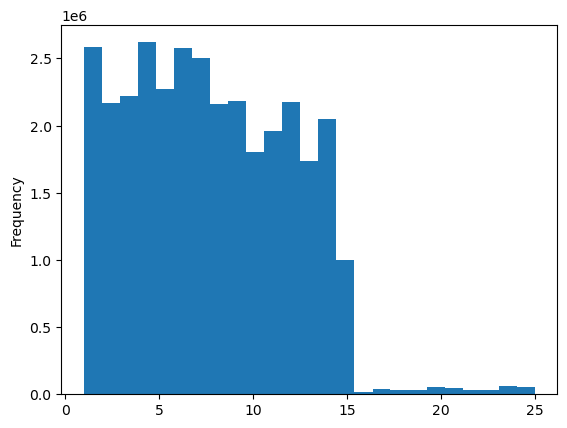

In [10]:
#Histogram for prices column with 25 bins
hist = insta_combined['prices'].plot.hist(bins = 25)

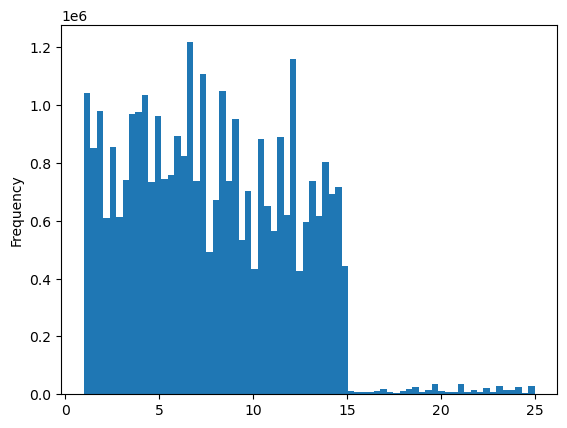

In [11]:
#Histogram for prices column with 70 bins
hist_1 = insta_combined['prices'].plot.hist(bins = 70)

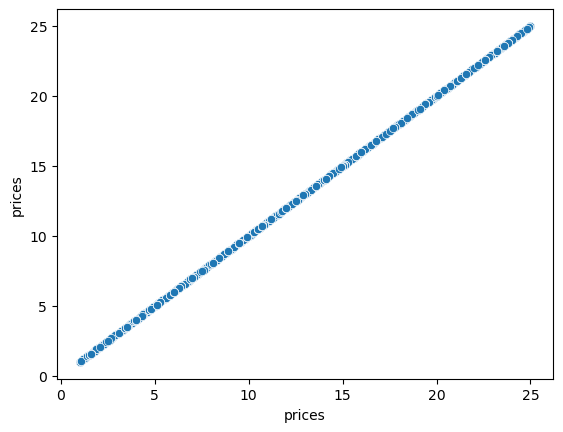

In [12]:
#Scatterplot of the prices column
scat = sns.scatterplot(x = 'prices', y = 'prices',data = insta_combined)

In [13]:
#Creating a 70/30 Sampling of the dataframe 
np.random.seed(4)
dev = np.random.rand(len(insta_combined)) <= 0.7

In [14]:
#List of randomized True and False values
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
#Checking the size 
dev.shape

(32404859,)

In [16]:
#Sample Example of the function
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
#Split the dataframe into two samples, 70% in the big and 30% in the small
big = insta_combined[dev]
small = insta_combined[~dev]

In [18]:
#Length of the sum of the two sample spaces
len(big) + len(small)

32404859

In [19]:
#Creating another dataframe to include only order_day_of_week ad prices from the small sample space
df_2 = small[['orders_day_of_week','prices']]

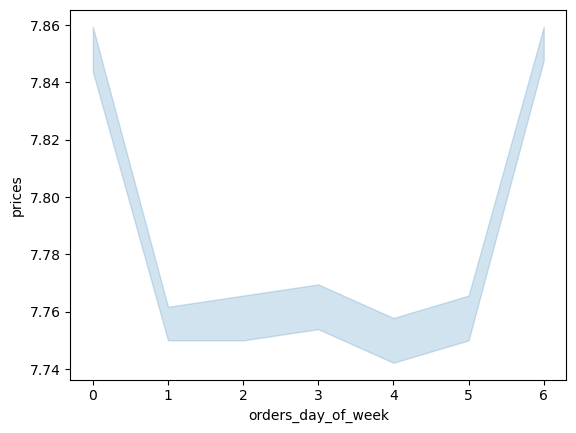

In [20]:
#Creating a line graph using the dataframe made of the small sample space
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Question 3: Create a histogram of the “order_hour_of_day” column. Provide Instacart senior stakeholders with descriptive findings about sales.

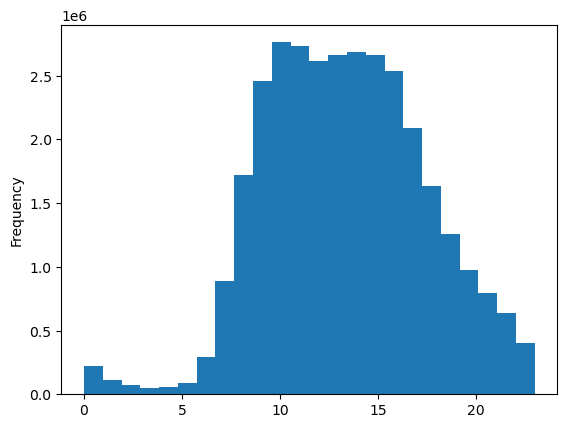

In [21]:
#Histogram for order_hour_of_day column with 24 bins 
hist_2 = insta_combined['order_hour_of_day'].plot.hist(bins = 24)

### Observations: this shows the shopping frecuency during the day. Lowest shopping hours are from 0 to 6, highest are from 7 to 15. It starts dropping off around the 16th hour.

# Question 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

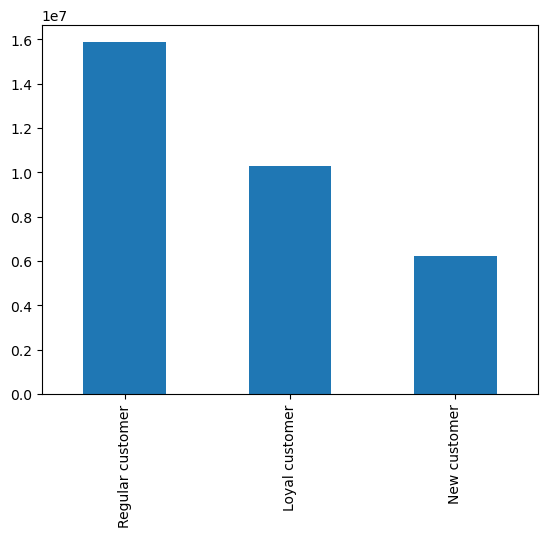

In [22]:
#Creating bar chart with loyalty_flag column

bar_3 = insta_combined['loyalty_flag'].value_counts().plot.bar()

### Observation: the majority of customers are regular customers.

# Question 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
#Creating line Chart  
df_line_chart = small[['order_hour_of_day', 'prices']]

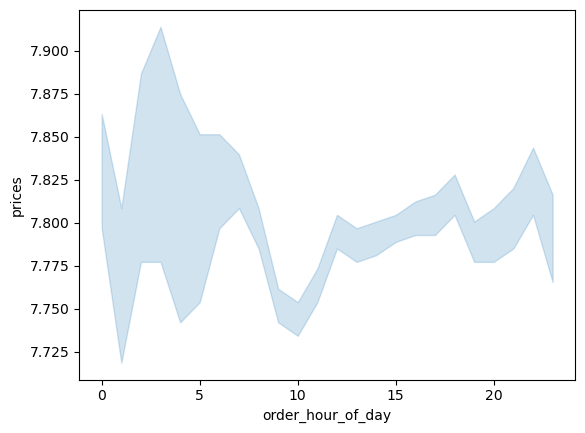

In [24]:
line_1 = sns.lineplot(data = df_line_chart, x = 'order_hour_of_day',y = 'prices')

# Question 6:  Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [25]:
# Line chart for exploring the connections between age and number of dependents

df_line_chart_1 = small[['age', 'n_dependants']]

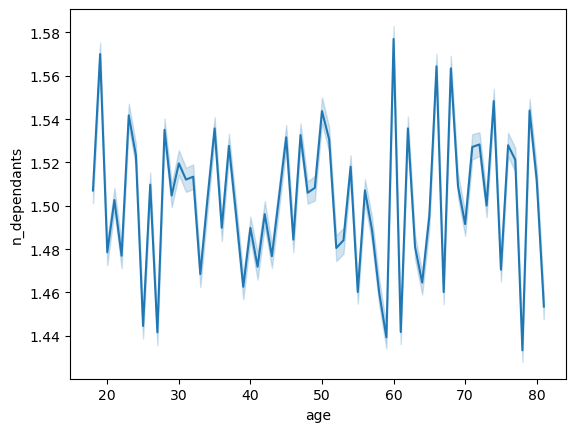

In [26]:
line_2 = sns.lineplot(data = df_line_chart_1, x = 'age',y = 'n_dependants')

### Observation: the highest number of dependants occur in the ages of 19-20, 60-70 years old. This could refer to young couples that have children or to households that have highschoolers, and elderly couples that have grandchildren or that their children are taking care of them. Starting at the age of 40 all the way to 50, there is a progressive increase of number of dependants, which makes sense because that's the time when parents kids are in college.

# Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

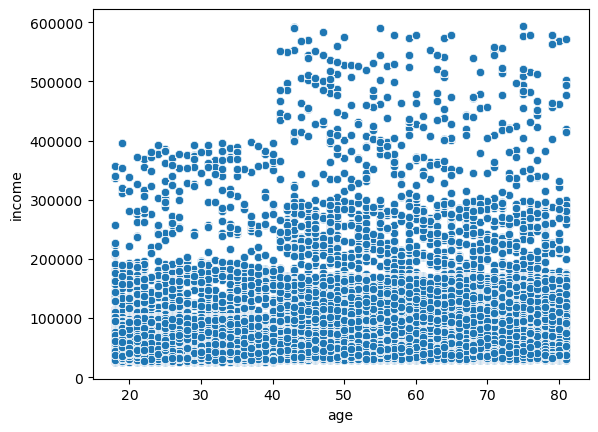

In [27]:
#Creating scatterplot
scat_1 = sns.scatterplot(x = 'age', y = 'income',data = insta_combined)

### Observation: we can see that the spending power increases with age. This is probably due to the fact that older people have gotten promoted more, and therefore their salaries have increased. We can see these spending power peaks from the ages of early 40's up until 80. While the ages do have less spending power, there are still some peaks from 19 to 40 years old (nevertheless, the majority reamins pretty much in the same lower range of spending power.

# Exporting visualizations

In [28]:
#Export bar chart for order_day_of_week column
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [29]:
#Export bar chart for order_day_of_week column according to index order
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'))

In [30]:
#Export bar chart for order_day_of_week column with color
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_color.png'))

In [31]:
#Export histogram for prices column with 25 bins

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [32]:
#Export histogram for prices column with 70 bins

hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_bins.png'))

In [33]:
#Export scatterplot of the prices column

scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

In [34]:
#Export line graph of the small sample space
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_sample.png'))

In [35]:
#Export histogram for order_hour_of_day column with 24 bins 
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohod.png'))

In [36]:
#Export bar chart with loyalty_flag column

bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [37]:
#Export line chart for difference in expenditure

line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_ohod.png'))

In [38]:
#Export line chart for connection between age and number of dependants

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [39]:
#Export scatterplot for relationship between age and income

scat_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))